<h1><b>Machine Learning Assignment - Assignment Set 11 Dataset</b></h1>

<h3>Assignment Group - 267</h3>

| Name | Bits ID |
| --- | --- 
| KASHYAP RAJPUROHIT | 2023ab05027@wilp.bits-pilani.ac.in |
| C RAMAKRISHNA | 2023ab05177@wilp.bits-pilani.ac.in |
| Vibhav Raman | 2023aa05805@wilp.bits-pilani.ac.in |
| Gundavarapu Sai Raghuram | 2023ab05139@wilp.bits-pilani.ac.in | |

<h2>Contents</h2>

* Importing Required Libraries
* Exploratory Data Analysis(EDA)
* Splitting the Dataset
* Logistic Regression
* Decision Tree
* K - Nearest Neighbour
* SVM
* Random Forest
* Naive Bayes Classifier
* Adaboost
* Behavioural Analysis of Models

<h2>Import required libraries</h2>

In [1]:
import pandas as pd
import numpy as np

# Just disable some undesirable warnings 
import warnings
warnings.filterwarnings('ignore')

# used in Z-score calculation
from scipy import stats

# used in scaling of features 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# All about plotting !! 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(style='darkgrid')
sns.set_theme(style="dark")
import plotly.graph_objs as go
import plotly.offline as py

#Analysis
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from collections import Counter
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

<h3>Import Dataset</h3>

In [6]:
# Import dataset
# data_path = "D:\MyWorkshop\Python\Notebooks\101 WILP\ML\Assignment-1\"
# data_file = 'Assignment_1_Set_11_Dataset.csv'
data_file = 'D:/MyWorkshop/Python/Notebooks/101 WILP/ML/Assignment-1/Assignment_1_Set_11_Dataset.csv'
hdds =  pd.read_csv(data_file)
hd_data = pd.read_csv(data_file)

<h3>Data Inspection</h3>

In [3]:
# Data Inspection
print (f"The heart disease dataset looks like.. \n{hd_data.head(2)}")

hd_data.columns

hd_data_summary = hd_data.describe()
print (f"Now, describe the dataframe:\n{hd_data_summary}")

The heart disease dataset looks like.. 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
Now, describe the dataframe:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3

### Data Visualisation and Exploration

#### a. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
#### The above statement can be broken down into..
##### i.   Print & inpect a few rows of data 
##### ii.  Identify all the features present in the dataset 
##### iii. w.r.t "if the target matches with them"..
This means checking if the target variable (the variable you are trying to predict) is correctly aligned with the features. In supervised learning tasks, it's crucial that the target variable is separate from the features and corresponds to the correct observations. By inspecting the rows, you can verify if the target variable is in the dataset and if it is aligned with the features.

In [4]:
# Inpect the data 
hd_data.head(5)

# Identify all the features 
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Identify the features

#### The following features are used for the prediction of heart disease presence.

age: age in years

sex:
0 = Female
1 = Male

cp: Chest pain types
0 = Typical angina
1 = Atypical angina
2 = Non-angina pain
3 = Asymptomatic

trestbps: Resting blood pressure (mmHg)

High blood pressure = 140 mmHg or above

chol: Serum cholestoral (mg/dL)
Certain elements in the blood, including low-density lipoprotein (LDL), high-density lipoprotein (HDL) and triglycerides
Calculation = HDL + LDL + 0.2 * triglycerides
Higher than 200 mg/dL is concerned

fbs: Fasting blood sugar (> 120 mg/dL)
0 = False
1 = True
Higher than 126 mg/dL points to diabetes

restecg: Resting electrocardiographic results
0 = Normal
1 = Abnormal ST-T wave
2 = Showing probable or definite left ventricular hypertrophy

thalach: Maximum heart rate achieved (bpm)

exang: Exercise induced angina
0 = Negative
1 = Positive

oldpeak: ST depression induced by exercise relative to rest

slope: The slope of the peak exercise ST segment
0 = Upsloping
1 = Horizontal
2 = Downsloping

ca: Number of major vessels (0-3) colored by fluoroscopy
The colored blood vessels are passing through
There is a clot if the blood vessel is not colored

thal: Thallium scintigraphy
3 = Normal
6 = Fixed defect
7 = Reversable defect

target: Heart Disease
0 = Benign
1 = Malignant

### Some basic analysis of the dataset 

In [5]:
print (f"The count of unique values in each of the variables. This helps identify the categorical variables")
print(hd_data.nunique())

The count of unique values in each of the variables. This helps identify the categorical variables
age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


### Exploring Gender and Age Distribution

In [6]:
hd_data["sex"].unique()

array([1, 0], dtype=int64)

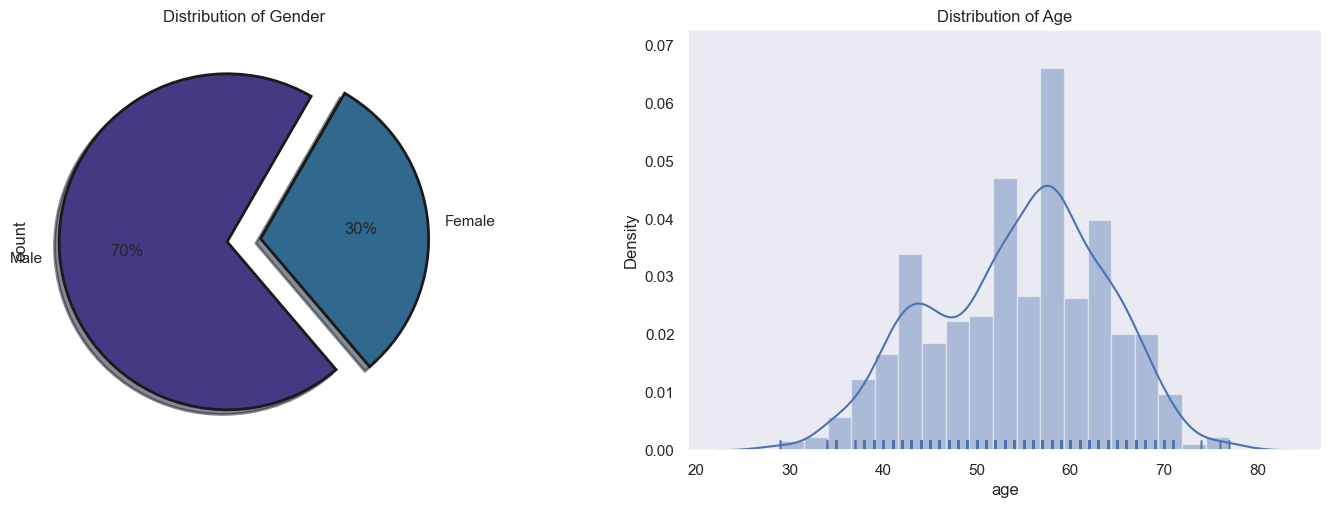

In [7]:
plt.figure(figsize=(18,12))
plt.subplot(221)
hd_data["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("viridis",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax = sns.distplot(hd_data['age'], rug=True)
plt.title("Distribution of Age")
plt.show()

#### Conclusion 

* The population of Males is more than double that of females
* The distribution of patients interms of age is almost normal, and the average age is around 55 years.  

### Gender Distribution versus the 'Target' variable 

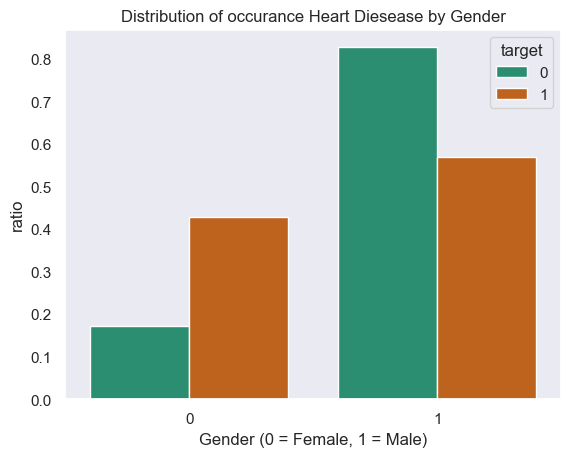

Distribution of occurance Heart Diesease by Gender:
Female: 42.97%
Male: 57.03%


In [8]:
hd_data['sex'].groupby(hd_data['target']).value_counts(normalize=True).rename('ratio').reset_index().pipe((sns.barplot, 'data'), x='sex', y='ratio', hue='target', palette='Dark2');
plt.title('Distribution of occurance Heart Diesease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.show()

# female_malignant vs. Malignant
f_dieseased = hd_data[hd_data['sex']==0]['target'].sum()/hd_data[hd_data['target']==1]['target'].count()
# male_malignant vs. Malignant
m_dieseased = hd_data[hd_data['sex']==1]['target'].sum()/hd_data[hd_data['target']==1]['target'].count()

print('Distribution of occurance Heart Diesease by Gender:')
print(f'Female: {f_dieseased:.2%}')
print(f'Male: {m_dieseased:.2%}')

Observations: 
1. Heart Disease is higher in males compared to females.

### Distribution of Age versus the 'target' variable

Text(0.5, 1.0, 'Distribution of "Malignant" Patients by Age')

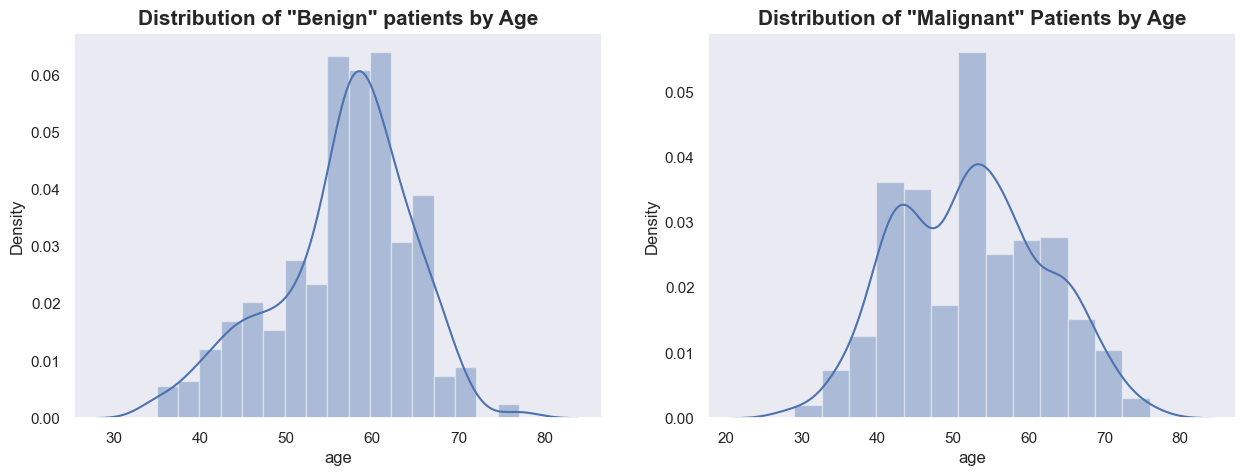

In [9]:
# Separate out patients with and without heart disease
hd_data_1 = hd_data[hd_data['target']==1]
hd_data_0 = hd_data[hd_data['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(hd_data_0['age'])
plt.title('Distribution of \"Benign\" patients by Age', fontsize=15, weight='bold')
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(hd_data_1['age'])
plt.title('Distribution of "Malignant" Patients by Age', fontsize=15, weight='bold')

Observations:
We can see from the above plots that the spread of malignant heart disease is spread across age groups. 

### Chest Pain distribution

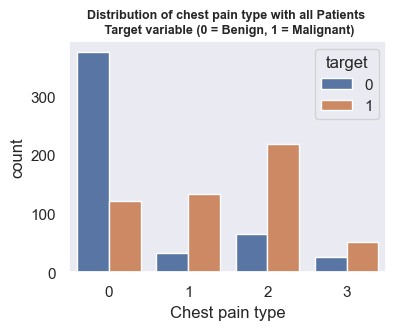

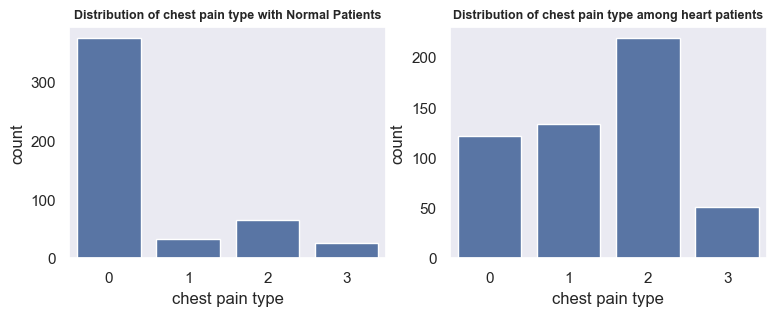

In [10]:
fig = plt.figure(figsize=(9,3))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(hd_data, x=hd_data["cp"], hue="target")
plt.title('Distribution of chest pain type with all Patients \n Target variable (0 = Benign, 1 = Malignant)', fontsize=9, weight='bold')
plt.xlabel('Chest pain type')

# plotting normal patients
fig = plt.figure(figsize=(9, 3))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(hd_data_0, x=hd_data_0["cp"])
plt.title('Distribution of chest pain type with Normal Patients', fontsize=9, weight='bold')
plt.xlabel('chest pain type')

# plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(hd_data_1, x=hd_data_1["cp"])
plt.title('Distribution of chest pain type among heart patients', fontsize=9, weight='bold' )
plt.xlabel('chest pain type')
plt.show()

Observations: 
1. Normal patients do not experience any abnormal (type 1, 2, or 3) types of chest pains. 
2. However, there are a few outliers even among the normal patients who experience chest pains. 
3. In the chart rendered for heart patients.. 
    a. we observe a high incidence of different types of abnormal chest pains 
    b. here, we also see a significant number of patients with heart disease who do not experience any chest pains (type = 0) 

### Distribution of ECG with the person at rest

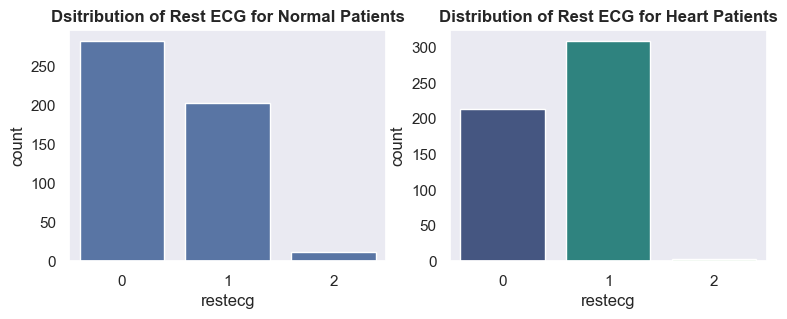

In [11]:
# plotting normal patients
fig = plt.figure(figsize=(9,3))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(hd_data_0, x=hd_data_0['restecg'])
plt.title('Dsitribution of Rest ECG for Normal Patients', fontsize=12, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(hd_data_1, x=hd_data_1['restecg'], palette='viridis')
plt.title('Distribution of Rest ECG for Heart Patients', fontsize=12, weight='bold' )
plt.show()

Observations

Though we see a difference in the readings in the Rest ECG readings between normal and heart patients. THe differences are not great enough except in a few cases. 

### Distribution of Numerical Features 

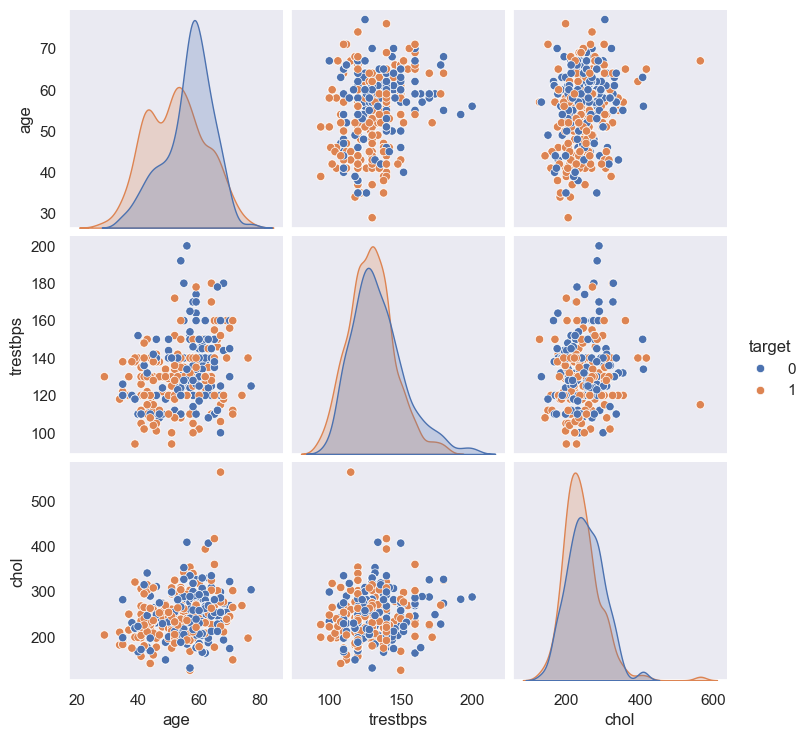

In [12]:
sns.pairplot(hd_data, hue = 'target', vars = ['age', 'trestbps', 'chol'] )

The above plot illustrates the increase in (risk of) heart disease with the progression of age!

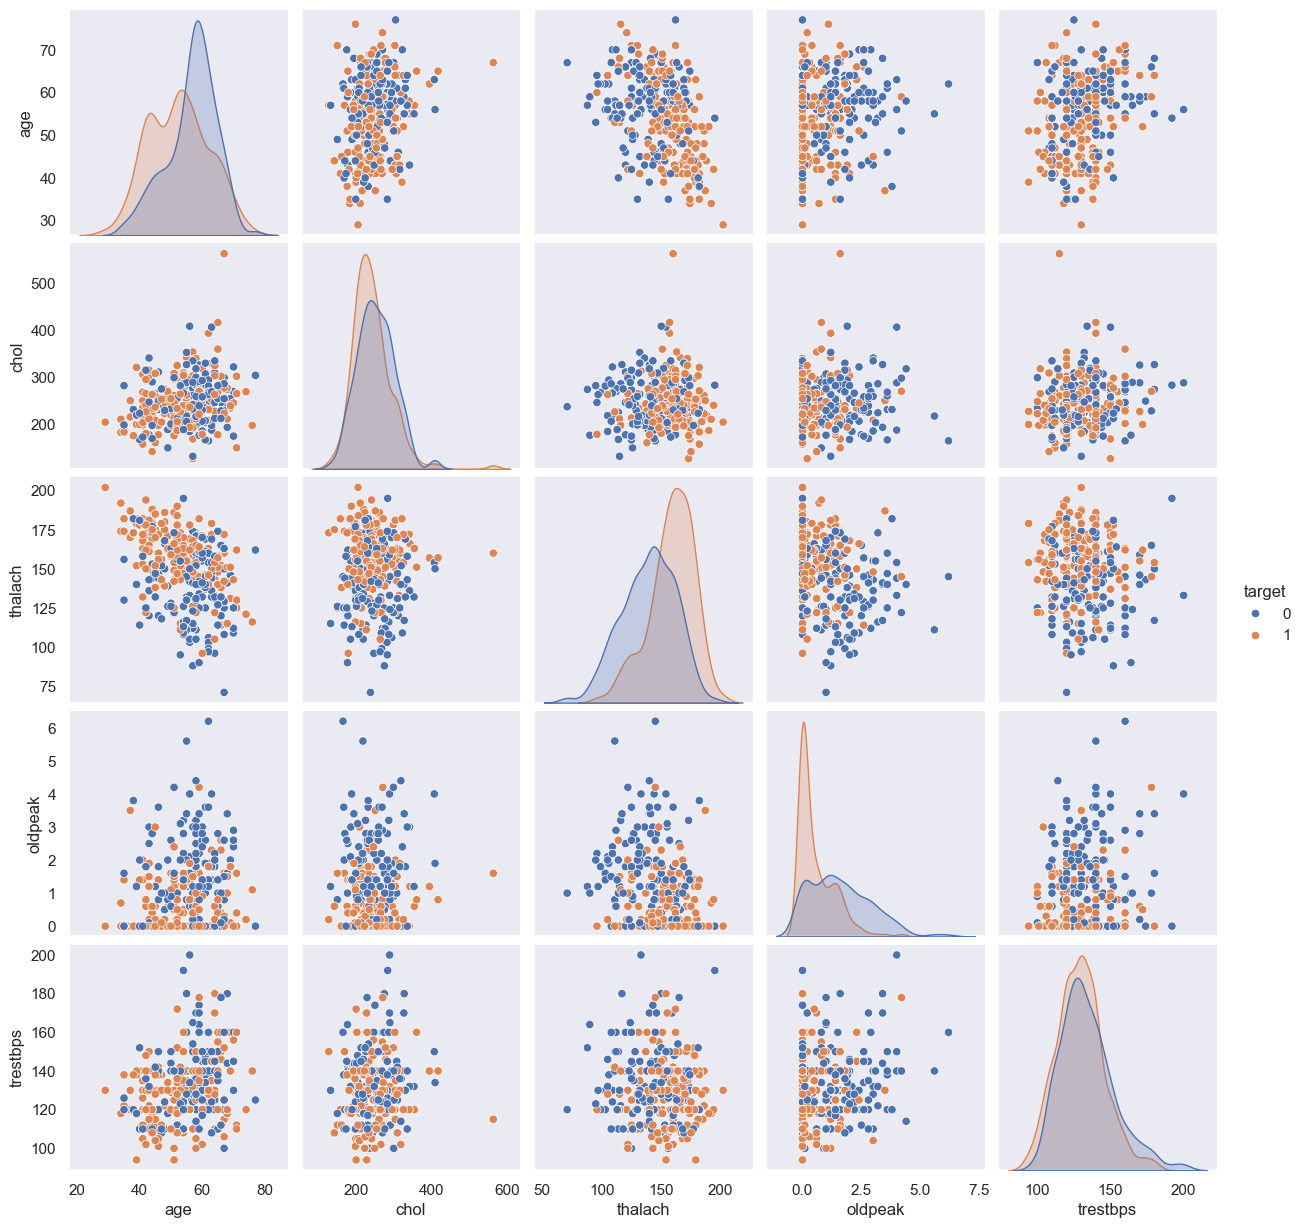

In [13]:
sns.pairplot(hd_data, hue = 'target', vars = ['age', 'chol', 'thalach', 'oldpeak', 'trestbps'] )

Observations
* oldpeak has a linear separation relation between occurance of disease and non-disease.
*  thalachhasg a mild separation relation betweeoccurance  disease and non-disease
* We also observe that   Other features d non’t fo any clear separati like above.on

#### Resting blood pressure (trestbps) versus choloesterol (chol)

The intent is to ascertain the variance of resting blood pressure value with cholesterol levels.

<Axes: xlabel='trestbps', ylabel='chol'>

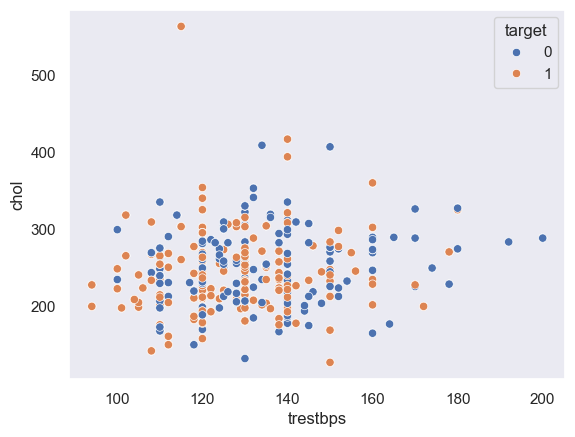

In [14]:
sns.scatterplot(x = 'trestbps', y = 'chol', hue = 'target', data = hd_data, palette ="deep")

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

### Resting Blood Pressure versus Age

<Axes: xlabel='trestbps', ylabel='age'>

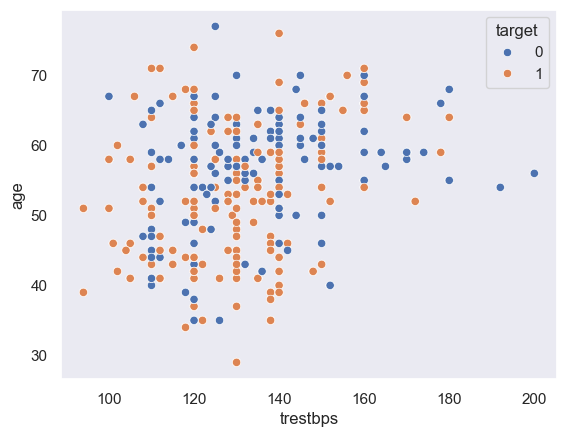

In [15]:
sns.scatterplot(x = 'trestbps', y = 'age', hue = 'target', data = hd_data)

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

###  Analysis of the target variable

In [16]:
 hd_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
hd_data[hd_data.target ==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


Let us look at the Class imbalance with appropriate visualization method 

When we analyze the y-variable i.e. the "target", the class imbalance in the values in not so pronounced. 

The distinct values in the y-variable are : [0 1]

The descriptive statistics of y-variable are : 
count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

Now, let us look at the distribution of the target variable: 
target
0    499
1    526
dtype: int64

Finally, let us plot the y-variable or target variable using a pie chart to better understand the distribution..


<Axes: >

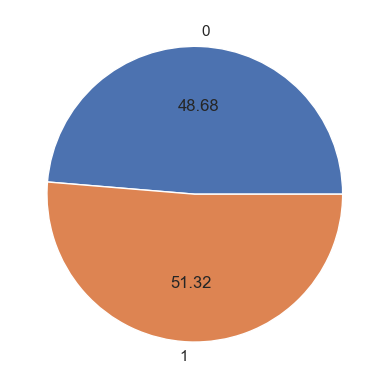

In [18]:
print (f"The distinct values in the y-variable are : {hdds['target'].unique()}")
print (f"\nThe descriptive statistics of y-variable are : \n{hdds['target'].describe()}")
print (f"\nNow, let us look at the distribution of the target variable: \n{hdds.groupby(['target']).size()}")
print (f"\nFinally, let us plot the y-variable or target variable using a pie chart to better understand the distribution..")
hdds.groupby('target').size().plot(kind='pie', autopct='%.2f')

Looking at the above analysis .. 
1.  There are two possible values for the y-variable or the dependant variable (0 & 1)
    Our understanding is that 0 indicates heart disease is benign and 1 indicates malignant heart disease.
2.  If we look at the counts or distribution of the two possible classes of values 0 and 1 are relatively evenly distributed 
    with 0 at 48.68% and 1 at 51.32%. 

From the above analysis of the y-variable, we see that..
The cholesterol level is relatively on the high for patients with heart disease (i.e. target = 1) when we compare this to patients with no heart disease.

### Now, let us explore this dataset further to get more insights 
####First, we perform correlational analysis on the dataset. Conclude whether this will have an impact on the feature selection. 
####Then, we perform further analysis by data visulaisation. 

The Correlation Co-efficient Matrix:


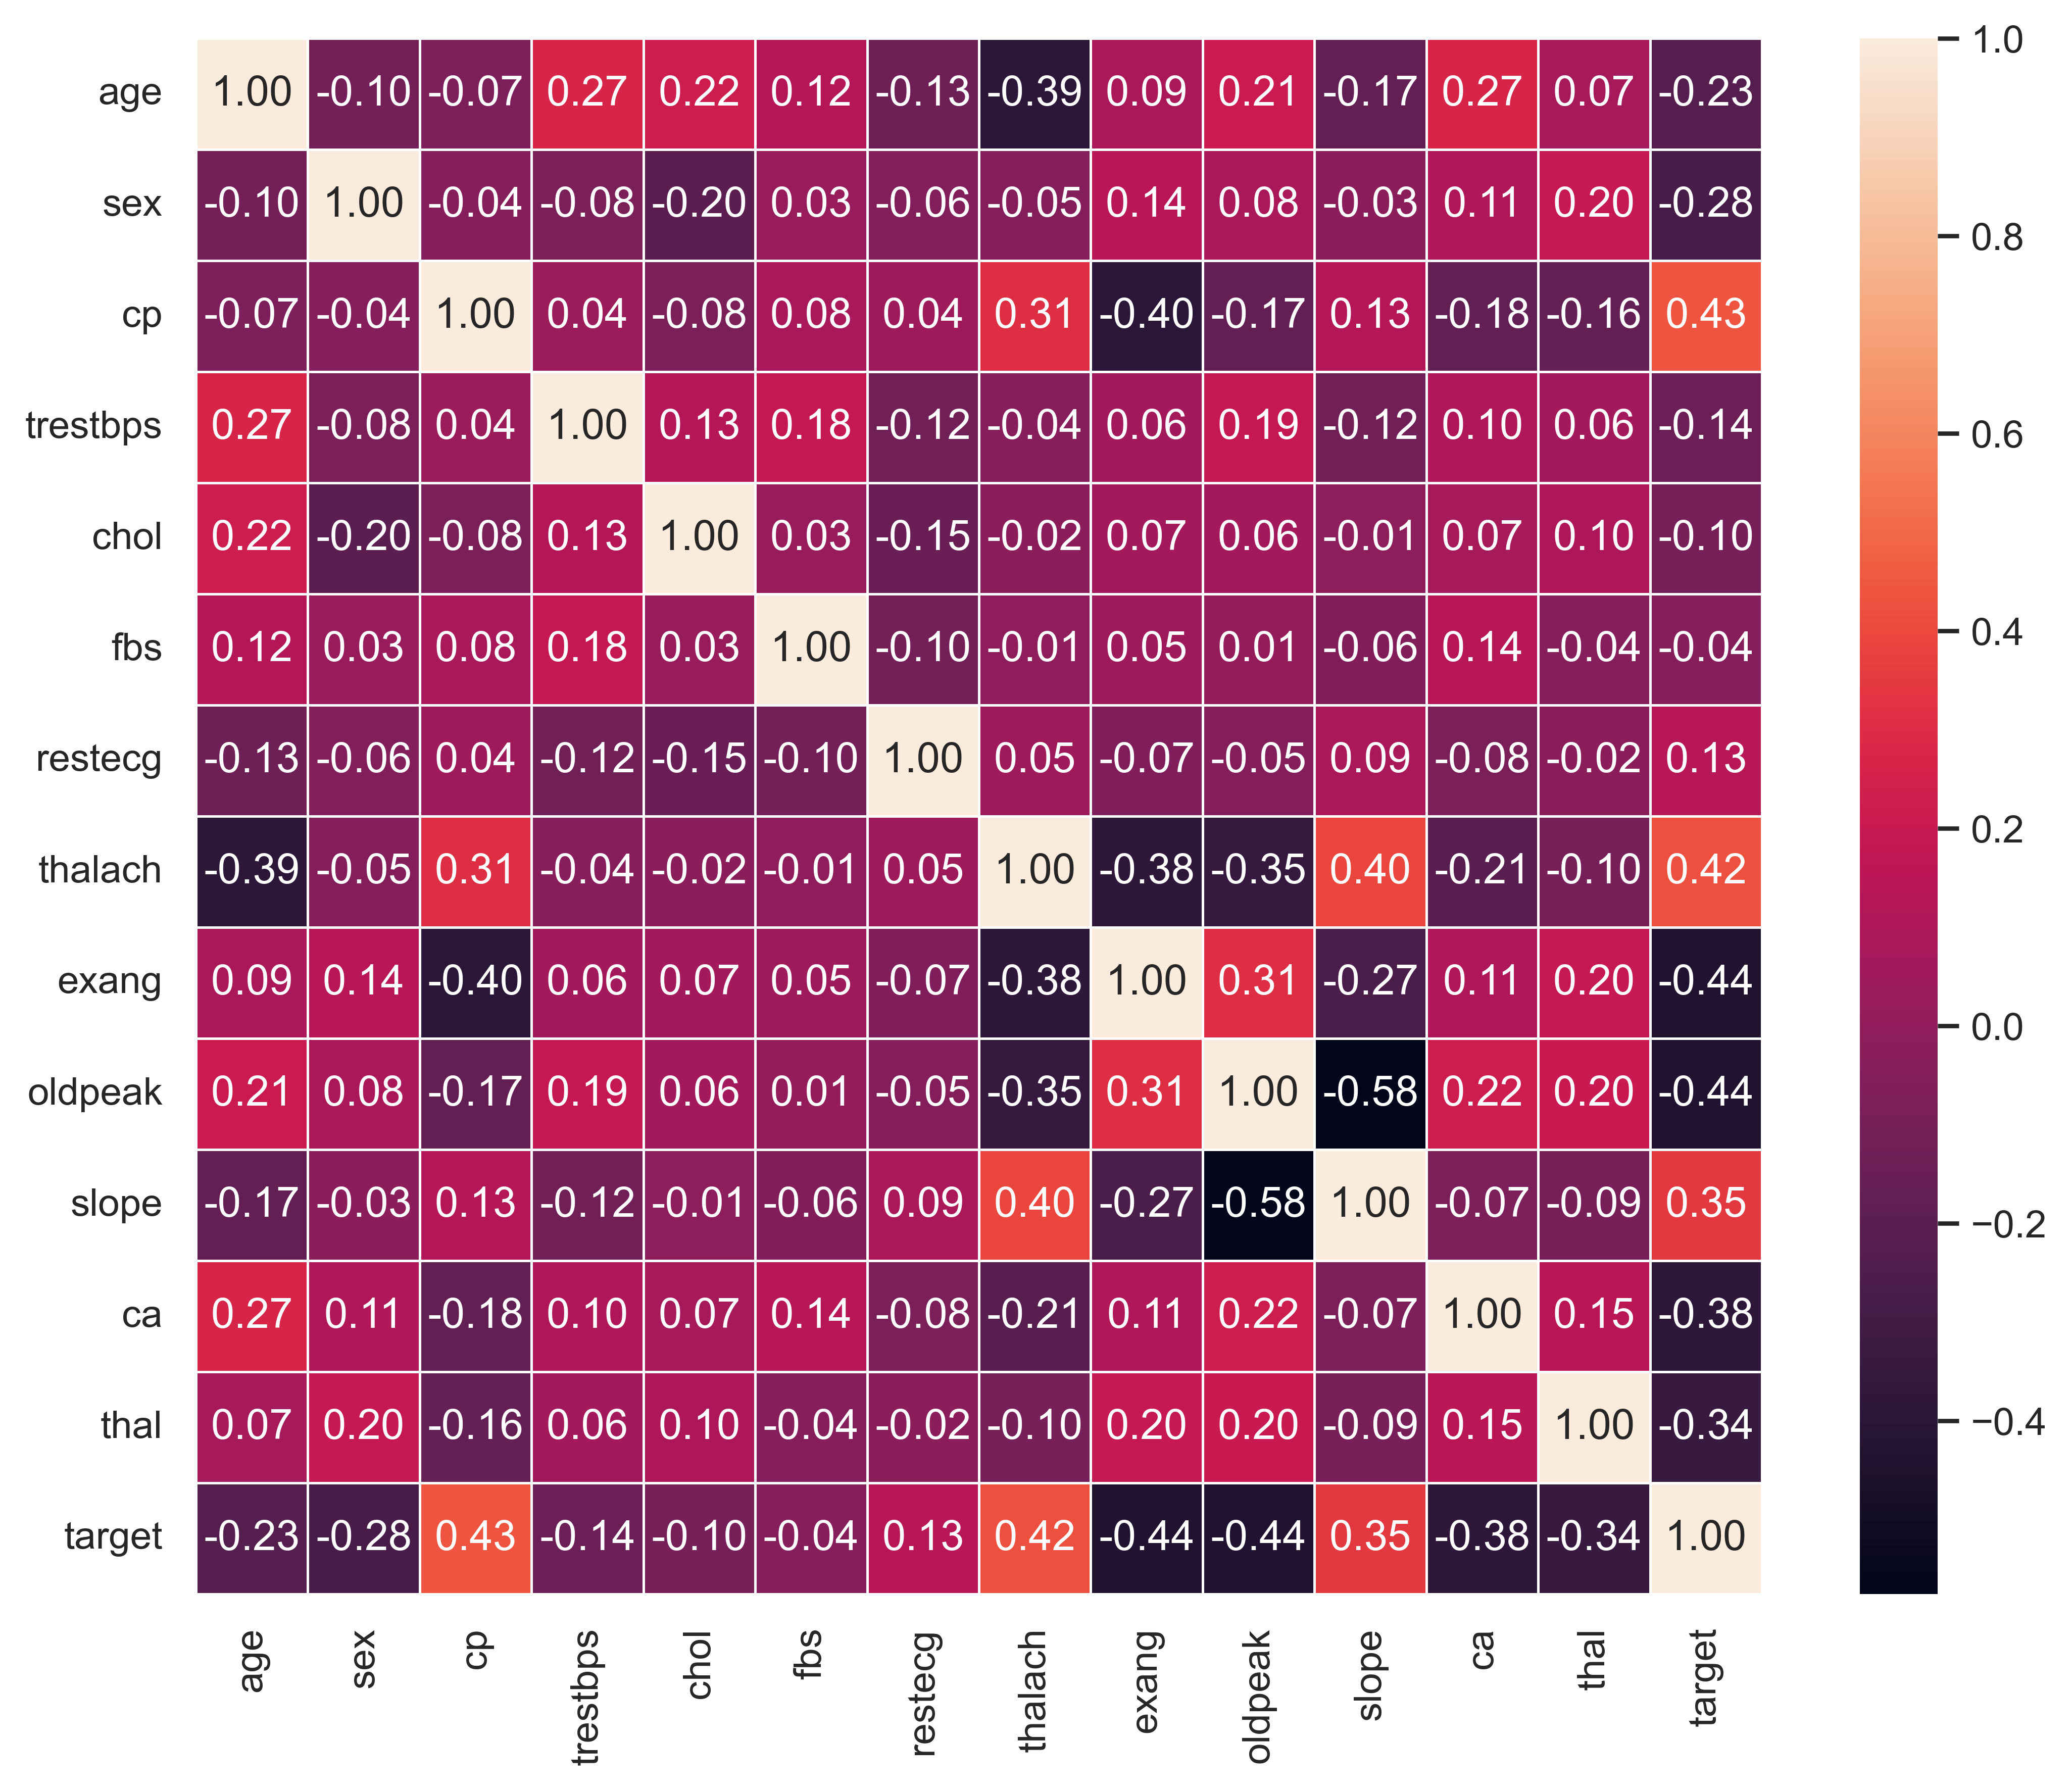

In [19]:
"""
# To find the correlation between the variables, use pandas 
df.corr(method, min_periods,numeric_only )

method : In method we can choose any one from {'pearson', 'kendall', 'spearman'} 
pearson is the standard correlation coefficient matrix i.e default
min_periods : int This is optional. Defines th eminimum number of observations required per pair.
numeric_only : Default is False, Defines we want to compare only numeric or categorical object also
"""
corr_coeffs = hdds.corr(method = 'pearson')
print (f"The Correlation Co-efficient Matrix:")
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr_coeffs,annot=True,fmt=".2f", linewidth=.5)
plt.show()

#### Observations 
From the above correlation matrix, we can see that a few features have negative correlation with the value of the target variable, while some have  a positive correlation. 

To analyze further, Let us take a look at the histograms for each variable.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

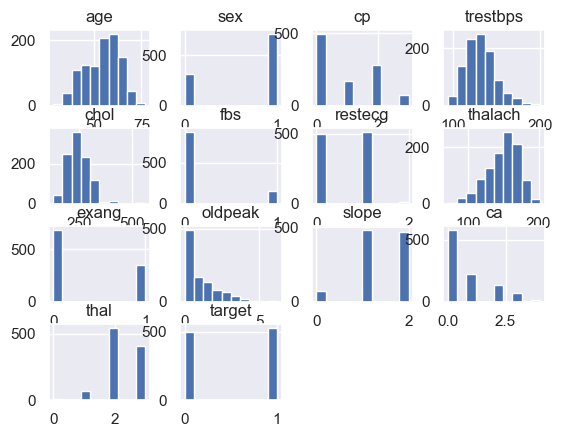

In [20]:
hdds.hist()

#### Observations

The histograms indicate that each feature has a distinct distribution range. Scaling these features prior to making predictions would be advantageous. 

Additionally, there are some categorical features. It is best practice to use a dataset where the target classes are of roughly equal size or on the same scale. 

#### Observations

The histograms indicate that each feature has a distinct distribution range. Scaling these features prior to making predictions would be advantageous. 

Additionally, there are some categorical features. It is best practice to use a dataset where the target classes are of roughly equal size or on the same scale. 

So far, we have done data exploration and also some sanity checks. 

This phase involves preparing the data and performing some basic cleaning if required...

1. Check and eliminate Nulls - Done
2. Check for Outliers 
3. Data Scaling and Encoding. 

First up, let us start with Outliers..
If we want to individually analyze the outliers... we can plot as below

           age  trestbps      chol   thalach
0     0.268437  0.377636  0.659332  0.821321
1     0.158157  0.479107  0.833861  0.255968
2     1.716595  0.764688  1.396233  1.048692
3     0.724079  0.936037  0.833861  0.516900
4     0.834359  0.364875  0.930822  1.874977
...        ...       ...       ...       ...
1020  0.503520  0.479107  0.484803  0.647366
1021  0.613800  0.377636  0.232705  0.352873
1022  0.819834  1.234378  0.562371  1.353113
1023  0.488996  1.234378  0.155137  0.429923
1024  0.047877  0.663216  1.124743  1.570556

[1025 rows x 4 columns]
(array([123, 151, 158, 175, 179, 192, 246, 267, 294, 296, 326, 378, 450,
       464, 481, 508, 559, 641, 665, 685, 688, 889, 958, 996], dtype=int64), array([2, 1, 2, 1, 2, 2, 1, 3, 1, 3, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2,
       2, 2], dtype=int64))


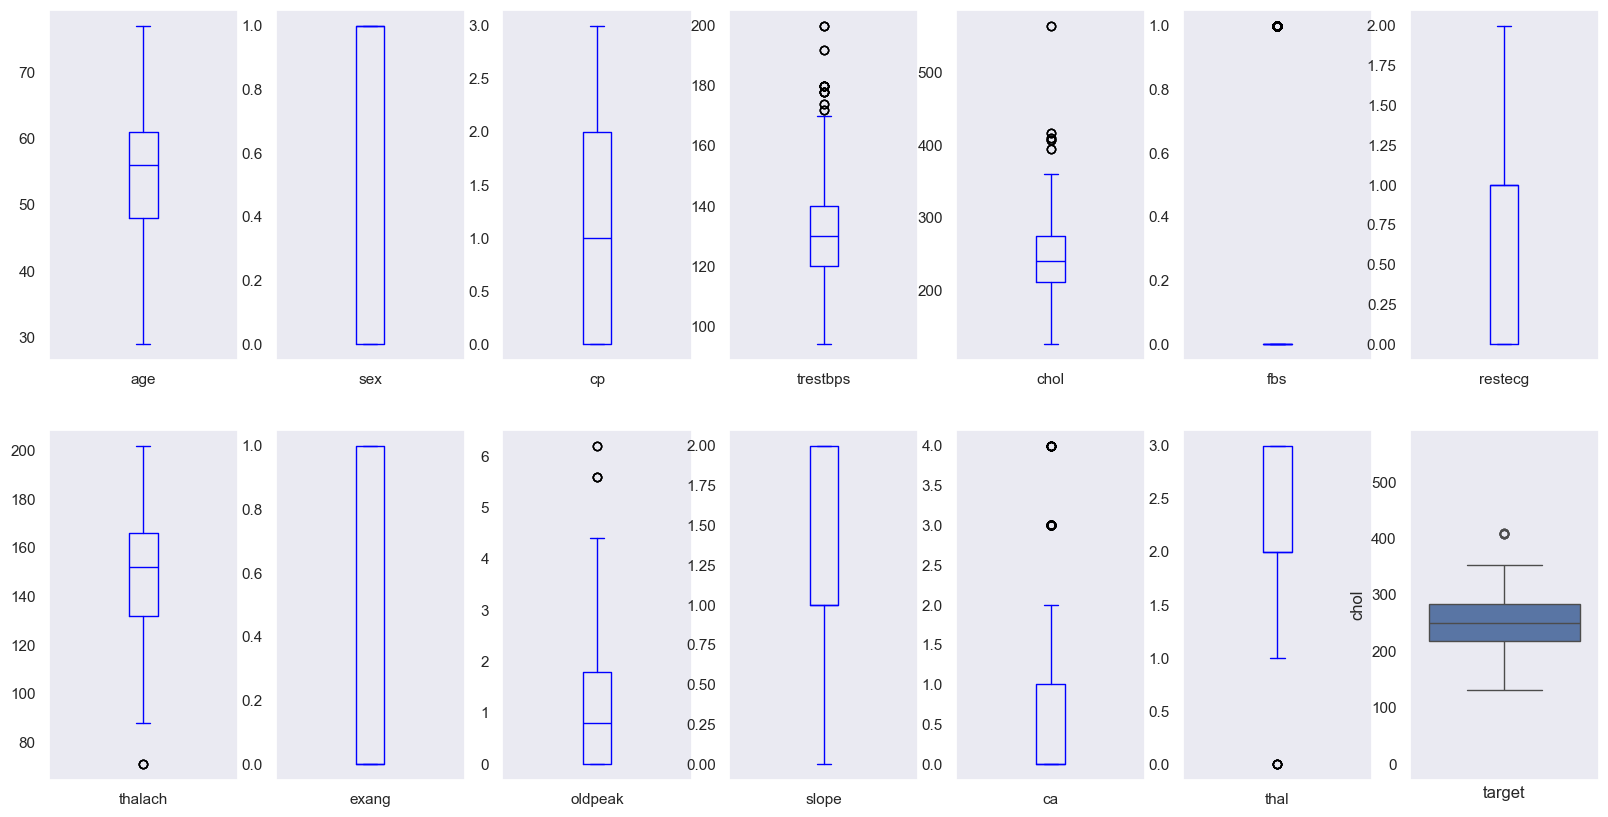

In [21]:
# Check for the presence of outliers. 
hd_data.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='blue')

# Another way of rendering to find Outliers
sns.boxplot(x='target', y='chol', data=hd_data)

# Outlier Detection and Removal 
# from EDA we found that the below features have outliers 
outds = hd_data[['age', 'trestbps','chol','thalach']]
outds.head()

# We calculate the zscore of numeric columns in the dataset
zscr = np.abs(stats.zscore(outds))
print(zscr)
# Then, we define the threshold for filtering outliers 
threshold = 3
print(np.where(zscr > 3))

##### To understand the above results.. The first array contains the list of row numbers and second array respective column numbers that has  a Z-score higher than 3. 

hd_data.shape

#filtering outliers retaining only those data points which are below threshhold
hd_data = hd_data[(zscr < 3).all(axis=1)]

hd_data.shape

If we observe the dataset now... compare the before and after sizes. There are total 24 data points which are outliers.

##### Now, Some more data pre-processing..

Earlier from the data exploration, we have observed that, some categorical variables needs to be converted into dummy variables and some some variables needs scaling of all the values before training the models. 

So, first, we use the get_dummies method from pandas library to create dummy columns for categorical variables.

In [22]:
hd_data = pd.get_dummies(hd_data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
hd_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


Now, we scale the variables in the dataset using the StandardScaler from sklearn!

In [23]:
standardScaler = StandardScaler()
columns_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']
hd_data[columns_to_scale] = standardScaler.fit_transform(hd_data[columns_to_scale])
hd_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


Just check one last time... for any class imbalance in the target variable!!

Text(0.5, 1.0, 'Count of each Target Class')

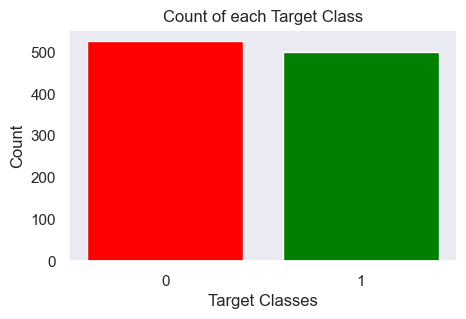

In [24]:
rcParams['figure.figsize'] = 5, 3
plt.bar(hd_data['target'].unique(), hd_data['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

Now, the dataset is ready for training the machine learning models. 

However, do NOT forget to segregate the x- and y-variables i,e, dependent and the independent valriables before performing the train-test split on the dataset

In [25]:
# train test split
y = hd_data['target']
X = hd_data.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

<h2><b>Logistic Regression</b></h2>

<h3>Initialize the learning parameters(12 parameters as we have 12 features):</h3>

<b>Justification:</b>
* Learning rate and epochs are initialized as below after lot of trail and error and checking the loss curve for every update

In [26]:
# Split data into features and target
x = hdds.iloc[:, :-1]
y = hdds.iloc[:, -1]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Initialize parameters
theta = np.zeros(x_train.shape[1] + 1)  # +1 for the bias term

# Learning rate and epochs are initialized as below after lot of trail and error and checking the loss curve for every update
learning_rate = 0.001
epochs = 100000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

x_train = np.insert(x_train.values, 0, 1, axis=1)
x_test = np.insert(x_test.values, 0, 1, axis=1)

<h3>Using Gradinet Descent for learning the parameters</h3>

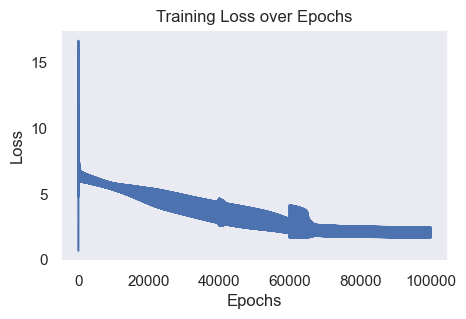

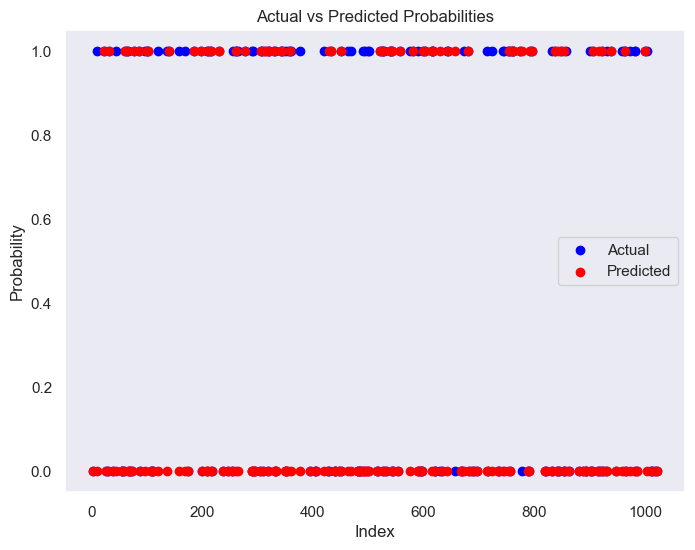

In [27]:
losses = []
for _ in range(epochs):
    linear_function_train = np.dot(x_train, theta)
    y_pred_train = sigmoid(linear_function_train)
    
    gradient = (1 / len(y_train)) * np.dot(x_train.T, (y_pred_train - y_train))
    theta -= learning_rate * gradient
    
    loss = binary_cross_entropy(y_train, y_pred_train)
    losses.append(loss)

# Predictions
linear_function_test = np.dot(x_test, theta)
y_pred_test = sigmoid(linear_function_test)
y_pred_binary = np.where(y_pred_test <= 0.5, 0, 1)

# Plot Loss Curve
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.scatter(y_test.index, y_pred_binary, color='red', label='Predicted')
#plt.plot(y_test.index, y_pred_test, color='green', label='Probabilities')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.title('Actual vs Predicted Probabilities')
plt.legend()
plt.show()

<b>Model Evaluation Metrics:</b>
* Confusion Matrix
* Accuracy
* Precision
* F1-Score
* ROC Curve

Confusion Matrix:
[[94  8]
 [49 54]]
Accuracy: 0.7219512195121951
Precision: 0.8709677419354839
Recall: 0.5242718446601942
F1 Score: 0.6545454545454545


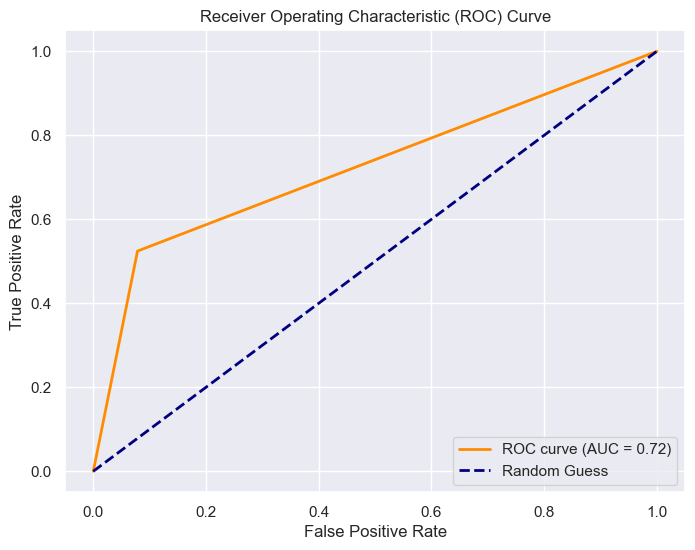

In [28]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

#Compute Recall
recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

#f1 score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

age  : -0.09088687944546102
sex : 0.10275441319407413
cp : -3.6685867833209893
trestbps : 5.263712474187684
chol : -0.09043252363678375
fbs : -0.05322029556021964
restecg : -0.10840551229464636
thalach : 0.6937064515557781
exang : 0.1672670344812226
oldpeak : -3.3212177675694328
slope : -5.000064350324571
ca : 1.8439201673034877
thal : -5.067676977169138
bias : -4.806445885363802


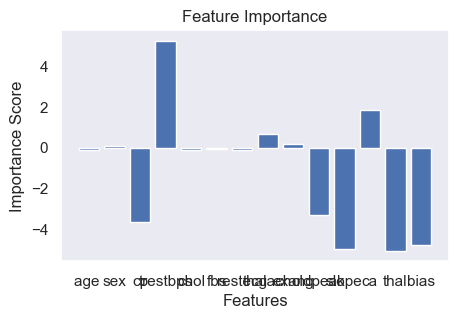

In [29]:
x = ['age ', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'bias']

i = 0
for i in range(0, len(x)):
    print(x[i] + ' : ' + str(theta[i]))

plt.bar(x, theta)

plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

plt.show()

<h2><b>Decision Tree Clsifier</b></h2>

In [30]:
# train test split
y = hd_data['target']
X = hd_data.drop(['target'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [32]:
print(Y_pred_dt.shape)

(339,)


In [33]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


Confusion Matrix:
[[158   0]
 [  0 181]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


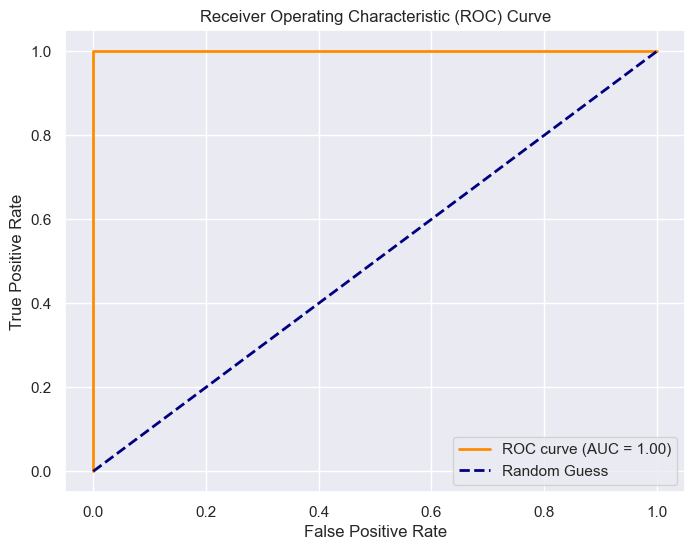

In [34]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_dt)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(Y_test, Y_pred_dt)
print("Precision:", precision)

#Compute Recall
recall = recall_score(Y_test, Y_pred_dt)
print("Recall:", recall)

#f1 score
f1 = f1_score(Y_test, Y_pred_dt)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<h1><b>K - Nearest Neighbour Algorithm</b></h1>

In [35]:
x = hdds.iloc[:, 0:13]
y = hdds.iloc[:, 13]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

<h3>Calculate the Euclidean distance and predict the test instances</h3>

In [36]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (820, 13)
X_test shape: (205, 13)


In [37]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common_label)
    return predictions


y_pred = knn_predict(x_train.values, y_train.values, x_test.values, k=3)
print("y_pred:", y_pred)
print("y_test:", y_pred)

y_pred: [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0]
y_test: [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0

<h3><b>NOTE:</b> Gradient Descent or any other optimization functions not used as this has not parameters to be optimized</h3>

<h3>Visualization</h3>

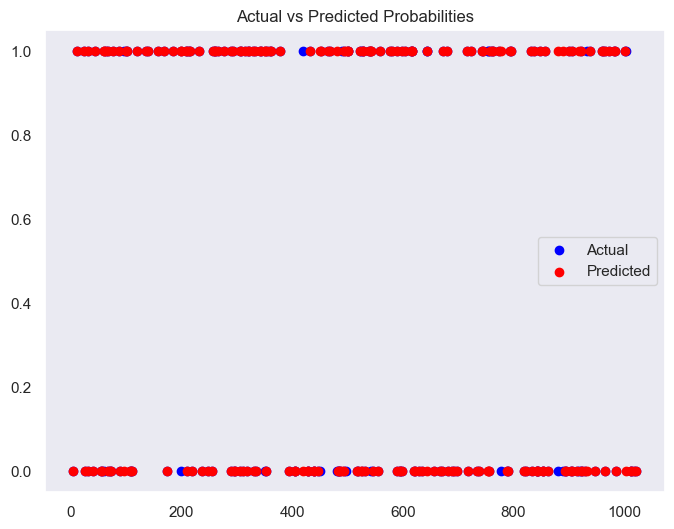

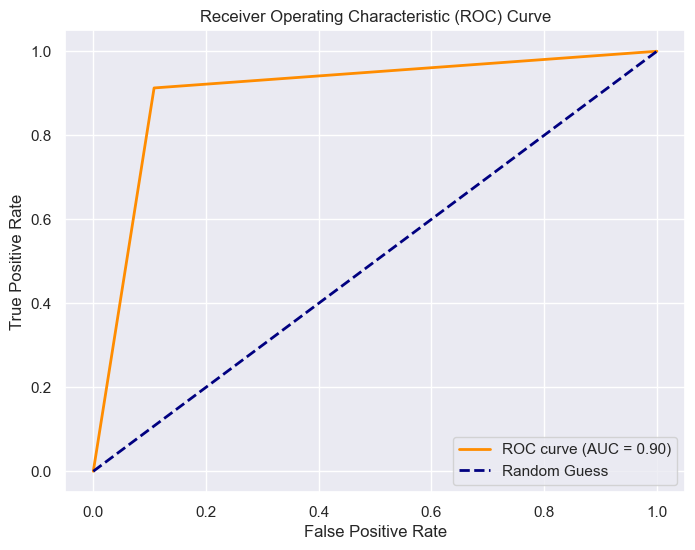

Confusion Matrix:
[[91 11]
 [ 9 94]]
Accuracy: 0.9024390243902439
Precision: 0.8952380952380953
Recall: 0.912621359223301
F1 Score: 0.9038461538461539


In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.scatter(y_test.index, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Probabilities')
plt.legend()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#Compute Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

#f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

<h2><b>Support Vector Machine (SVM)</b></h2>

In [39]:
x = hdds.iloc[:, 0:13]
y = hdds.iloc[:, 13]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [40]:
print("Data types of X_train:", x_train.dtypes)
print("Data types of y_train:", y_train.dtypes)

Data types of X_train: age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object
Data types of y_train: int64


In [41]:
#def svm_fit(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
#    n_samples, n_features = X.shape
#    weights = np.zeros(n_features)
#    bias = 0

#    for _ in range(n_iters):
#        for x_i, y_i in zip(X, y):
#            prediction = np.dot(x_i, weights) - bias
#            if y_i * prediction >= 1:
#                weights -= learning_rate * (2 * lambda_param * weights)
#            else:
#                weights -= learning_rate * (2 * lambda_param * weights - y_i * x_i)
#                bias -= learning_rate * y_i
#
#    return weights, bias
#
#def svm_predict(X, weights, bias):
#    predictions = []
#    for x_i in X:
#        prediction = np.dot(x_i, weights) - bias
#        predictions.append(1 if prediction >= 0 else 0)  
#    return predictions

#weights, bias = svm_fit(x_train, y_train)
#y_pred = svm_predict(x_test, weights, bias)
#print("y_pred:", y_pred)


svm_classifier = SVC(kernel='linear')  


svm_classifier.fit(x_train, y_train)


y_pred = svm_classifier.predict(x_test)

print("y_pred:", y_pred)

y_pred: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


<h3>Visualization</h3>

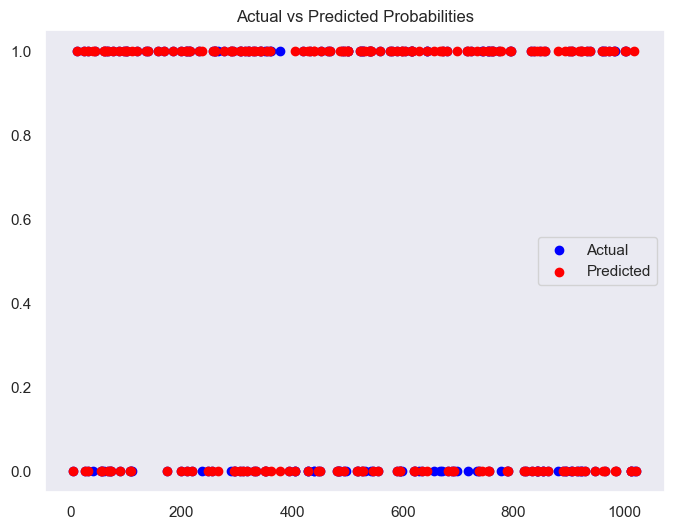

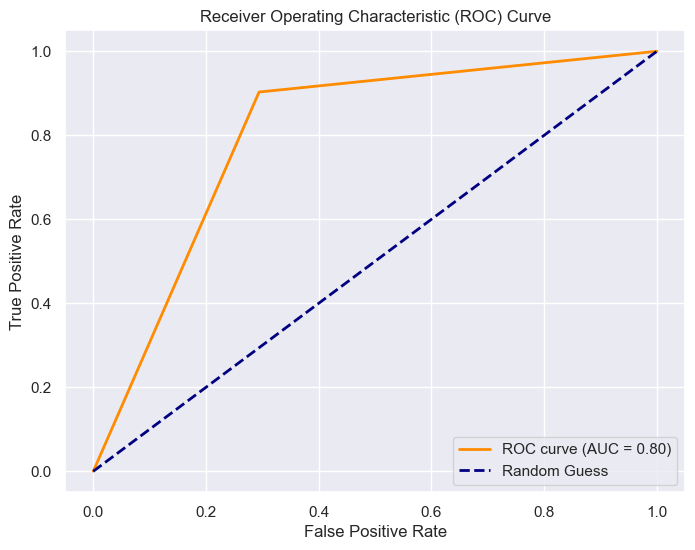

Confusion Matrix:
[[72 30]
 [10 93]]
Accuracy: 0.8048780487804879
Recall: 0.9029126213592233
F1 Score: 0.8230088495575221
Precision: 0.7560975609756098


In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.scatter(y_test.index, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Probabilities')
plt.legend()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Compute Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

#f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

<h2><b>Naive Bayes Classifier</b></h2>

In [43]:
# Load the modified dataset (pre-processed and scaled)
data = pd.read_csv(data_file)

# Split data into features (X) and target (y)
X = data.drop(columns=["target"])
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()


# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


# Save the trained model to a file
#model_filename = "nb_model.pkl"
#joblib.dump(nb_classifier, model_filename)
#print(f"Model saved as {model_filename}")

from sklearn.feature_selection import SelectKBest, chi2

# Load your dataset (replace with your actual data)
#data = pd.read_csv("ml_assignment_1.csv")

# Separate features (X) and target (y)
X = data.drop(columns=["target"])
y = data["target"]

# Select top k features using chi-squared test
k = 5  # Choose the desired number of features
chi2_selector = SelectKBest(chi2, k=k)
X_new = chi2_selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = chi2_selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print(f"Selected features: {', '.join(selected_features)}")

from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to display feature scores
mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_df.sort_values(by="MI Score", ascending=False, inplace=True)
print(mi_df)

# Compute feature importances using permutation importance
imps = permutation_importance(nb_classifier, X_test, y_test)
print(imps.importances_mean)

Accuracy: 0.80
Precision: 0.75
Recall: 0.89
F1-score: 0.82
ROC-AUC: 0.80
Selected features: cp, thalach, exang, oldpeak, ca
     Feature  MI Score
4       chol  0.276561
12      thal  0.165203
9    oldpeak  0.144787
2         cp  0.144366
7    thalach  0.138766
11        ca  0.137932
8      exang  0.093319
0        age  0.072979
3   trestbps  0.070574
10     slope  0.062639
1        sex  0.031519
6    restecg  0.027452
5        fbs  0.000000
[ 0.01170732  0.03219512  0.03609756  0.00682927 -0.00195122 -0.00292683
 -0.00585366  0.02341463  0.04390244  0.05658537  0.00682927  0.02243902
  0.02829268]


<h2><b>Random Forest Classifier</b></h2>

Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1-score: 0.99
ROC-AUC: 0.99


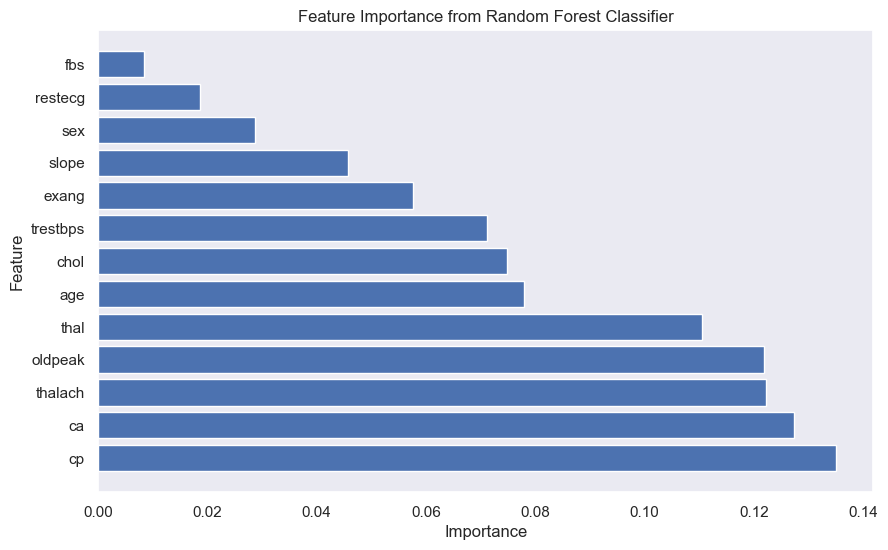

In [44]:
# Load the modified dataset (pre-processed and scaled)
data = pd.read_csv(data_file)

# Split data into features (X) and target (y)
X = data.drop(columns=["target"])
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


# Save the trained model to a file
#model_filename = "random_forest_model.pkl"
#joblib.dump(rf_classifier, model_filename)
#print(f"Model saved as {model_filename}")

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest Classifier")
plt.show()

<h2><b>Adaboost Classifier</b></h2>

Top important features contributing to predictions:
    Feature  Importance
0       age        0.18
7   thalach        0.16
4      chol        0.14
9   oldpeak        0.14
3  trestbps        0.08


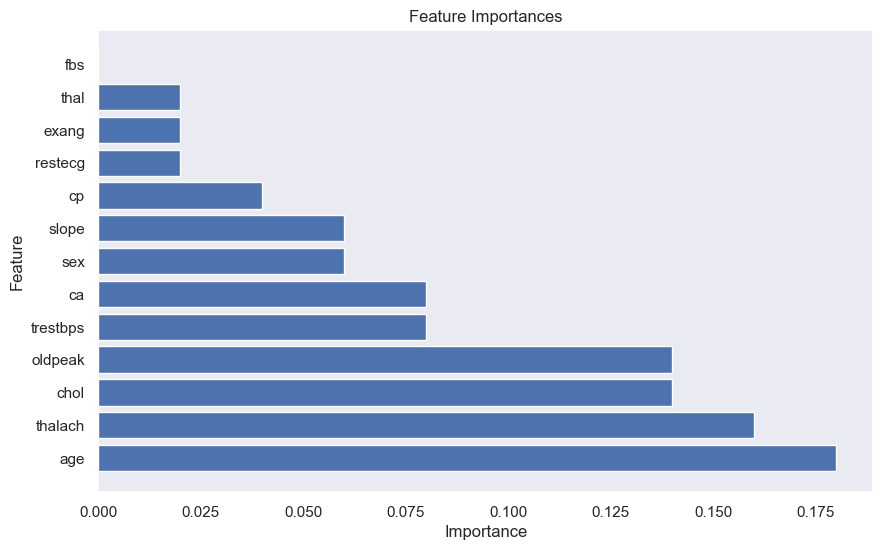

Accuracy: 0.88
Precision: 0.89
Recall: 0.86
F1-score: 0.88
ROC-AUC: 0.88


In [45]:
# Load the modified dataset (pre-processed and scaled)
data = pd.read_csv(data_file)

# Separate features and target variable
X = data.drop(columns=["target"])
y = data["target"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Get feature importances
feature_importances = adaboost.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the top important features
print("Top important features contributing to predictions:")
print(feature_importance_df.head())

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

# Calculate evaluation metrics
#print("Classification report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

<h2><b>Behavioural Analysis</b></h2>

| Model              | Accuracy | Precision | Re-call | F1-score | ROC-AUC | Feature importance                                      | Interpretation                                                                                               |
|--------------------|----------|-----------|---------|----------|---------|---------------------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| Random forest      | 0.99     | 1         | 0.97    | 0.99     | 0.99    | Technique used: rf classifier feature importance.       | 1. correctly predicts the class labels for 99% of the instances.                                             |
|                    |          |           |         |          |         |                                                         | 2. Cp    3. it captures 97% of the actual positive instances.                                                 |
|                    |          |           |         |          |         |                                                         | 3. Ca    4. excellent performance in distinguishing between positive and negative classes.                 |
|                    |          |           |         |          |         |                                                         | 4. thalach                                                                                                   |
|                    |          |           |         |          |         |                                                         | 5. oldpeak                                                                                                   |
|                    |          |           |         |          |         |                                                         | 6. thal                                                                                                      |
| Naive Bayesian     | 0.8      | 0.75      | 0.89    | 0.82     | 0.8     | Technique used: top k features using chi squared (K=5) | 1. model predicts the class labels for 80% of the instances.                                                  |
|                    |          |           |         |          |         |                                                         | 2. cp,    3. correctly identifies 75% of the true positive instances.                                        |
|                    |          |           |         |          |         |                                                         | 3. thalach                                                                                                   |
|                    |          |           |         |          |         |                                                         | 4. exang,                                                                                                    |
|                    |          |           |         |          |         |                                                         | 5. oldpeak,                                                                                                  |
|                    |          |           |         |          |         |                                                         | 6. ca                                                                                                        |
| Adaboost           | 0.88     | 0.89      | 0.86    | 0.88     | 0.88    | Technique used: adaboost feature importance.            | 1. correctly predicts the class labels for 88% of the instances.                                             |
|                    |          |           |         |          |         |                                                         | 0       age        0.18                                                                                      |
|                    |          |           |         |          |         |                                                         | 7   thalach        0.16                                                                                      |
|                    |          |           |         |          |         |                                                         | 4      chol        0.14                                                                                      |
|                    |          |           |         |          |         |                                                         | 9   oldpeak        0.14                                                                                      |
|                    |          |           |         |          |         |                                                         | 3  trestbps        0.08                                                                                      |
| SVM                | 0.814    | 0.76      | 0.922   | 0.833    | 0.81    | Technique used: Support Vector Machine                  | 1. correctly predicts the class labels for 81% of the instances.                                             |
|                    |          |           |         |          |         | feature importance: NA                                 | 2. Parameter tuning has to be done to get better results with SVM.                                           |
| KNN                | 0.965    | 1         | 0.932   | 0.964    | 0.97    | Technique used: K - Nearest neihbour (k = 3)           | 1. correctly predicts the class labels for 96% of the instances.                                             |
|                    |          |           |         |          |         | feature importance: NA                                 | 2. Precision 1 indicates that all the positive predictions made by the model are correct, meaning there are no false positives. |
| Logistic Reression | 0.81     | 0.77      | 0.88    | 0.827    | 0.81    | Technique used: Logistic regression                     | "age  : 0.678677314907703                                                                                    |
|                    |          |           |         |          |         | sex : 0.011263462163937098                                                                                      |
|                    |          |           |         |          |         | cp : -1.0337661203599504                                                                                         |
|                    |          |           |         |          |         | trestbps : 0.9171520557525394                                                                                    |
|                    |          |           |         |          |         | chol : -0.32931217632796717                                                                                      |
|                    |          |           |         |          |         | fbs : -0.23394275291311992                                                                                       |
|                    |          |           |         |          |         | restecg : -0.15015297303744307                                                                                   |
|                    |          |           |         |          |         | thalach : 0.5020481739909575                                                                                      |
|                    |          |           |         |          |         | exang : 1.1633896290054961                                                                                       |
|                    |          |           |         |          |         | oldpeak : -0.8724780859603322                                                                                    |
|                    |          |           |         |          |         | slope : -0.6546665052255326                                                                                      |
|                    |          |           |         |          |         | ca : 0.8871987584410441                                                                                          |
|                    |          |           |         |          |         | thal : -0.8279055506606182"                                                                                     |
|                    |          |           |         |          |         | "1. correctly predicts the class labels for 81% of the instances.                                           |
|                    |          |           |         |          |         | 2. Less accuracy in predicting classes compared to SVM and KNN."                                            |


<b>Observations</b>
 * Out of all the classifiers it is observed that the <b>Random Forest Classifier</b> and <b>Support Vecor Machine</b> has been seen to give accurate classification compared to other Classifiers.
 * Not all the Classifiers are having weights for the Features. If we see in case of the K-NN Classifier is used with K = 3, the feature importance is not taken into consideration, Instead the Euclidean distance is being consodered for predictions.